<h1> Linear Programming </h1><br>
This notebook is for linear programming using scipy and pulp. Several simple optimization problems are covered for the purpose of illustration and to learn how to use python for this task.

In [1]:
c = [-1, 4]

In [2]:
A = [[-3, 1], [1, 2]]

In [3]:
b = [6, 4]

In [7]:
x0_bounds = (None, None)

In [8]:
x1_bounds = (-3, None)
from scipy.optimize import linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),options={"disp": True})

Optimization terminated successfully.
         Current function value: -22.000000  
         Iterations: 1


In [9]:
print(res)

     fun: -22.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([ 39.,   0.])
  status: 0
 success: True
       x: array([ 10.,  -3.])


<h2>Example 1</h2><br>
Three products are processed through three different operations. The time in munutes required per unit of each product, 
the daily capacity of the operations (in minutes per day) and the profit per unit sold of each product (in pounds) are as given
in the table.
The zero times indicate that the product does not require the given operation. It is assumed that all units produced
are sold. The given profits per unit are net values that result after all pertinent expenses are deducted. Formulate a linear 
programming model that fits the daily production. <br> <br>
<table>
<tr></tr>
<tr>
    <td> Operation </td><td> Product 1 </td><td> Product 2 </td><td> Product 3 </td><td> Operation capcity (minutes/day </td>
</tr>
<tr>
    <td> 1 </td><td> 2 </td><td> 1 </td><td> 1 </td><td> 360 </td>
</tr>
<tr>
    <td> 2 </td><td> 0 </td><td> 3 </td><td> 2 </td><td> 330 </td>
</tr>
<tr>
    <td> 3 </td><td> 4 </td><td> 1 </td><td> 0 </td><td> 320 </td>
</tr>
<tr>
    <td> Profit/unit (£) </td><td> 3 </td><td> 2 </td><td> 4 </td><td>  </td>
</tr>
</table>

Solution: We require<br>
(1) the variables. <br>
(2) the objective function. <br>
(3) the constraints.
   <br><br> The variables are the daily number of units to be manufactured for each product.
   <br> 
   <br>The number of units produced of products 1, 2 and 3 are denoted $x_1, x_2, x_3$ <br> The total profit in pounds is <br>
   $$x_0 = 3x_1 + 2x_2+4x_3 \quad (1)$$ <br>
   The constraints of the problem must ensure that the total processing time required by all produced units does not exceed the daily capacity of each operation. <br>
   $$2x_1 + 1x_2+1x_3 \leq 360 $$ <br>
   $$0x_1 + 3x_2+2x_3 \leq 330 $$ <br>
   $$4x_1 + 1x_2+0x_3 \leq 320 $$ <br>
   and <br> $$x_1 \gt 0,x_2\gt 0, x_3\gt0  $$ <br>
   <br> So the task is to maximize (1) subject to the constraints.

In [28]:
X0 = [-3., -2.,-4.]
A1 = [[2.0, 1.0, 1.0],[0, 3.0, 2.0],[ 4.0, 1.0, 0]]

B1 = [360., 330., 320.]
x0_bounds = (0., None)
x1_bounds = (0., None)
x2_bounds = (0., None)
from scipy.optimize import linprog
res = linprog(X0, A_ub=A1, b_ub=B1,options={"disp": True, "maxiter":3})

Optimization terminated successfully.
         Current function value: -900.000000 
         Iterations: 2


In [4]:
print(res)

     fun: -900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 35.,   0.,   0.])
  status: 0
 success: True
       x: array([  80.,    0.,  165.])


I will assume that this means we produce 80 of product 1 and 165 of product 3, the profit is optimal at £900

In [7]:
80 * 3 +165*4

900

In [9]:
timeForOp1Prod1 = 2*80

In [10]:
timeForOp3Prod1 = 4*80

In [11]:
timeForOp1Prod3 = 165

In [12]:
timeForOp2Prod3 = 2*165

In [13]:
times=[ timeForOp1Prod1+timeForOp1Prod3,timeForOp2Prod3, timeForOp3Prod1]

In [14]:
times

[325, 330, 320]

It is clear that after 2 iterations the linear solver is almost optimal, the values should be integers becase you cannot make half of a product. The people working in operation 1 get an extra tea break

<h2> Example 2 </h2>
<p> One application of linear programming deals with the search for optimal feed mix for an animal or group of animals at the least cost. 
The constraints of the model include <br>
(1) The daily nutrition requirements of the animal <br>
(2) The physical limitations, e.g supply (ignored here), taste, etc. <br>
The objective is to minimize the total cost of a batch of the feed mix while the ensuring the animal gets the correct nutrition and the constraints are satisfied. <br>
<br> Assuming the required daily batch of the feed mix is 100 pounds. The diet must contain <br>
1) Between 0.9 percent calcium and 2.2 percent calcium <br>
2) At least 25 percent protein <br>
3) At most 5% percent fibre.
<br><br>
The main ingredients or feedstuffs used include limestone (calcium carbonate), grain, and soya. The nutritive content of these ingredients is summarized in the table
<br><br>
<table>
<tr>
    <th>ingredient</th>
    <th>calcium</th>
    <th>protein</th>
    <th>fibre</th>
    <th>cost(£) per pound </th>
</tr>
<tr>
    <td> limestone </td>   <td>0.3</td> <td>0.00</td> <td>0.00</td><td>0.02</td>
</tr>
<tr>
    <td> grain </td>   <td>0.001</td> <td>0.075</td> <td>0.02</td><td>0.045</td>
</tr>
<tr>
    <td> soya </td>   <td>0.004</td> <td>0.5</td> <td>0.1</td><td>0.095</td>
</tr>
</table>

Solution: Let $x_1,x_2,x_3$ be the amounts (in pounds of weight) of limestone corn and soybean meal used in producing the feed mix batch of 100 pounds. Then the linear programming model becomes
    <br>
    $$x_0 = 0.02x_1+0.045x_2+0.095x_3$$
    <br><br>
    subject to the constraints $$x_1+x_2+x_3 = 100$$ <br>
    $$ 0.3x_1+0.001x_2+0.004x_3 \leq 0.022 \times 100$$ <br>
    $$ 0.3x_1+0.001x_2+0.004x_3 \geq 0.009 \times 100$$ <br>
    $$ 0.075x_2+0.5x_3 \leq 0.25 \times 100$$ <br>
    $$ 0.02x_2+0.1x_3 \leq 0.05 \times 100$$ <br>
     $$ x_1,x_2,x_3 \geq 0$$ <br>

    

In [15]:
X0 = [0.02,0.045,0.095]
A=[[1,1,1],[0.3,0.001,0.004],[-0.3,-0.001,-0.004],[0.0,0.075,0.5],[0.0,0.02,0.1]]
b=[100,2.2,-0.9,25,5]
res = linprog(X0, A_ub=A, b_ub=b,options={"disp": True, "maxiter":3})
print res

Optimization terminated successfully.
         Current function value: 0.060000    
         Iterations: 1
     fun: 0.059999999999999998
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([ 97. ,   1.3,  25. ,   5. ,   0. ])
  status: 0
 success: True
       x: array([ 3.,  0.,  0.])


In [16]:
print res

     fun: 0.059999999999999998
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([ 97. ,   1.3,  25. ,   5. ,   0. ])
  status: 0
 success: True
       x: array([ 3.,  0.,  0.])


This result can be easily tested to be false, because the sum of the components of the x array do not add up to 100, as the first constraint is supposed to stipulate. This shall be fixed after subsequent examples.

<h2>Example 3</h2><br>
<p> A factory has 3 machines, M1, M2, and M3 used in making 2 products P1 and P2. One unit of P1 occupies M1 6 minutes, M2 4 minutes, and M3 2 minutes. The corresponding figures for one unit of P2 are: M1 1 minute, M2 3 minutes, M3 5 minutes. The net profit per unit of P1 produced is 6 pounds, and the net profit of each unit of p2 produced is 4 pounds. What production plan gives the most profit.</p> 

Ans: The problem is to maximize <br> $f=6x_1+4x_2$ <br>
subject to the constraints <br>
$6x_1+x_2 \leq 60$<br>
$4x_1+3x_2 \leq 60$<br>
$2x_1+5x_2 \leq 60$<br>
and $x_1,x_2 \geq 0$

This can also be expressed in matrix form <br>
$x_0=6x_1+4x_2$ <br><br>
$\mathbf {Ax}\leq\mathbf b$ <br><br>
$ \begin{pmatrix} 6&1\\4&3\\2&5\end{pmatrix}\begin{pmatrix} x_1\\x_2\end{pmatrix}\leq\begin{pmatrix}60\\ 60\\ 60 \end{pmatrix} $

<br>
And as the problem is to Maximize, the input function array must have negative coefficients [-6,-4] because the linprog function <i>minimizes</i>

<p style="color:red"> The Rows of the A matrix correspond to machine M1, M2 and M3 while the columns correspond to the products they produce </p> 

In [29]:
X0 = [-6,-4]
A=[[6,1],[4,3],[2,5]]
b=[60,60,60]
res = linprog(X0, A_ub=A, b_ub=b,options={"disp": True, "maxiter":3},callback = lambda *x,**kwargs: None)

Optimization terminated successfully.
         Current function value: -85.714286  
         Iterations: 2


In [30]:
print res

     fun: -85.714285714285722
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0.,  0.])
  status: 0
 success: True
       x: array([ 8.57142857,  8.57142857])


The maximal profit is therefore 80 £/hour, the values of $x_1,x_2$ are [8.57142857,  8.57142857], below is a graphical plot of the constraints, the solution space is the purple shaded region representing the intersection of the 3 spaces (x's >0)

(0, 20)

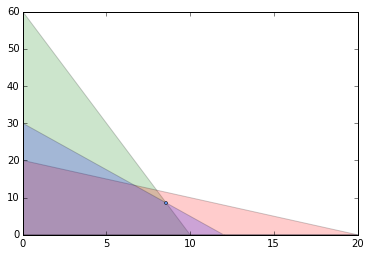

In [37]:
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0.0, 20, 0.01)
y1 = -6*x + 60
y2 = (-3*x+60)/3
y3=(-5*x+60)/2

fig = figure()
ax1 = fig.add_subplot(111)

marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
                    markersize=3, markerfacecoloralt='gray')


plt.plot(8.57142857,  8.57142857,'-gD',**marker_style)

ax1.fill_between(x, 0, y1, facecolor='green', alpha=0.2)
ax1.fill_between(x, 0, y2, facecolor='red', alpha=0.2)
ax1.fill_between(x, 0, y3, facecolor='blue', alpha=0.2)
#ax1.fill(x, y1, 'b', x, y2, 'r', x, y3, 'g', alpha=0.3)
ax1.set_ylim([0,60])
ax1.set_xlim([0,20])


<h2>Example 4</h2><br>
A manufacturer makes a line of houshold products from sheet metal. He makes 4 products and that his production system consists of 5 production centers: stamping, drilling, asssembly, finishing, and packaging. For 1 month he must decide how much of each product to manufacture. He has assembled the data shown in tables 1 and 2. He knows that only 3000 square feet of the sheet metal used in products 2 and 4 will be available during the month. Product 2 requires 3.0 square feet per unit and product 4 uses 1.7 square feet per unit.

<br> formuate this as a linear programming model <br>
<h2> Table 1         Production data </h2>
<table>
<tr>
    <th>DEPARTMENT</th>
    <th>PRODUCT 1</th>
    <th>PRODUCT 2</th>
    <th>PRODUCT 3</th>
    <th>PRODUCT 4</th>
    <th>PRODUCTION HOURS AVAIlABLE</th>
</tr>
<tr>
    <td>Stamping</td>
    <td>0.15</td>
    <td>0.03</td>
    <td>0.05</td>
    <td>0.1</td>
    <td>750</td>
</tr>
<tr>
    <td>Drilling</td>
    <td>0.12</td>
    <td>0.06</td>
    <td>-</td>
    <td>0.1</td>
    <td>700</td>
</tr>
<tr>
    <td>Assembly</td>
    <td>0.2</td>
    <td>0.04</td>
    <td>0.03</td>
    <td>0.12</td>
    <td>875</td>
</tr>
<tr>
    <td>Finishing</td>

    <td>0.1</td>
    <td>-</td>
    <td>0.05</td>
    <td>0.12</td>    
    <td>900</td>
</tr>
<tr>
    <td>Packaging</td>
    <td>0.06</td>
    <td>0.02</td>
    <td>0.02</td>
    <td>0.05</td>
    <td>800</td>
</tr>
</table>
<br><br>
<h2> Table 2         Product data </h2>
<table>
<tr>
    <th>PRODUCT</th>
    <th>NET SELLING (PRICE/UNIT)</th>
    <th>VARIABLE (COST/UNIT)</th>
    <th>MINIMUM</th>
    <th>MAXIMUM</th>

</tr>
<tr>
    <td>1</td>
    <td>£12</td>
    <td>£7</td>
    <td>800</td>
    <td>4000</td>

</tr>
<tr>
    <td>2</td>
    <td>22</td>
    <td>12</td>
    <td>-</td>
    <td>1500</td>

</tr>
<tr>
    <td>3</td>
    <td>19</td>
    <td>12</td>
    <td>500</td>
    <td>3000</td>

</tr>
<tr>
    <td>4</td>
    <td>23</td>
    <td>14</td>
    <td>100</td>
    <td>1000</td>

</tr>

</table>



Solution: <br>
Let $x_i$ be the number of units of unit of product $i$ produced in the month and $Z$ be the total contribution to profit and overhead. The problem is to choose non-negative $x_1,x_2,x_3,x_4$ to maximize the fixed cost, that is the net selling price minus the varisble cost<br>
$Z=5x_1 +10x_2+5x_3+9x_4$ <br>
<br>and subject to the constraints on product hours for each department <br>

$0.15x_1+0.03x_2+0.05x_3+0.1x_4\leq750$                    Stamping<br>
$0.12x_1+0.06x_2\qquad\quad+0.1x_4\leq700$                    Drilling<<br>
$0.2x_1+0.04x_2+0.03x_3+0.12x_4\leq875$                    Assembly<br>
$0.1x_1\qquad\quad+0.05x_3+0.12x_4\leq900$                    Finishing<br>
$0.06x_1+0.02x_2+0.02x_3+0.05x_4\leq800$                   Packaging<br>

<br>
There is also a constraint on sheet metal availability. <br>
$3.0x_2+1.7x_4\leq 3000$
<br>
with the following bounds <br>
$800\leq x_1\leq4000$<br>
$0\leq x_2\leq1500$<br>
$500\leq x_3\leq3000$<br>
$100\leq x_4\leq1000$<br>

In [19]:
Z=[-5, -10, -5, -9, 0]
A=[[0.15, 0.03, 0.05, 0.1, 0.0],
   [0.12, 0.06, 0.0, 0.1, 0.0],
   [0.2, 0.04, 0.03, 0.12, 0.0],
   [0.1, 0.0, 0.05, 0.12, 0.0],
   [0.06, 0.02, 0.02, 0.05, 0.0],
   [0.0, 3.0, 0.0, 1.7, 0.0]]
b=[750, 700, 875, 900, 800, 3000]
x1_bounds = (800, 4000)
x2_bounds = (0, 1500)
x3_bounds = (500, 3000)
x4_bounds = (100, 1000)
x5_bounds = (0, 0)
res = linprog(Z, A_ub=A, b_ub=b, bounds=(x1_bounds, x2_bounds,x3_bounds,x4_bounds,x5_bounds),options={"disp": True})

Optimization terminated successfully.
         Current function value: -44525.000000
         Iterations: 8


In [20]:
print res

     fun: -44525.0
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([  1.25000000e+00,   1.85400000e+02,   0.00000000e+00,
         3.06166667e+02,   4.87033333e+02,   0.00000000e+00,
         2.43833333e+03,   7.61666667e+02,   0.00000000e+00,
         2.50000000e+03,   0.00000000e+00,   9.00000000e+02,
         0.00000000e+00,   0.00000000e+00])
  status: 0
 success: True
       x: array([ 3238.33333333,   433.33333333,  3000.        ,  1000.        ,
           0.        ])


<br><br><h2>Revisiting example 2 </h2><br>
We can exress the equality $x_1+x_2+x_3=100$ as another row in the A matrix, by inserting two expressions <br>
$x_1+x_2+x_3\leq101$ <br>
$-x_1-x_2-x_3\leq-99$
<br><br>
and padding the A matrix with extra columns of zeros to make it square. This answer will only ever approximate the correct solution, so to be correct to several significant figures we can use numbers like 100.000001 and 99.999999

In [21]:
X0 = [0.02,0.045,0.095]
A=[[1,1,1],[0.3,0.001,0.004],[-0.3,-0.001,-0.004],[0.0,0.075,0.5],[0.0,0.02,0.1]]
b=[100,2.2,-0.9,25,5]

X0 = [0.02,0.045,0.095,0.0,0.0,0.0]

A=[[ 1  ,1,     1      ,0,0,0],
   [-1  ,-1   ,-1      ,0,0,0],
   [0.3, 0.001, 0.004 ,0,0,0],
   [-0.3,-0.001,-0.004,0,0,0],
   [0.0,0.075,0.5   ,0,0,0],
   [0.0,0.02,0.1  ,0,0,0]]

b=[100.01,-100.00,2.2,-0.9,25.0,5.0]
res = linprog(X0, A_ub=A, b_ub=b,options={"disp": True})

Optimization terminated successfully.
         Current function value: 4.324415    
         Iterations: 3


In [22]:
print res

     fun: 4.3244147157190636
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([  1.00000000e-02,   0.00000000e+00,   1.80267559e+01,
         3.14046823e+00,   0.00000000e+00,   0.00000000e+00])
  status: 0
 success: True
       x: array([  7.02341137,  92.97658863,   0.        ,   0.        ,
         0.        ,   0.        ])


so apparently, we need to feed the animals only limestone and grain ... the sum of the components of the x array add up to 100 (or close enough within tolerable significant figures, give or take a grain or two)

<h3>Example 5</h3><br>
There are three factories F1,F2 and F3 suupying goods to three warehouses W1,W2,and W3. The demand, supply and costs of shipping from factory i to warehouse j are given in the table. Find the minimum cost.<br><br>
<h2> Table </h2>
<table>
<tr>
<th></th>
<th>F1</th>
<th>F2</th>
<th>F3</th>
<th>Units Demanded</th>
</tr>
<tr>
    <td>W1</td>
    <td>£1.00</td>
    <td>£.90</td>
    <td>£1.20</td>
    <td>50</td>
</tr>
<tr>
    <td>W2</td>
    <td>£1.40</td>
    <td>£1.90</td>
    <td>£.60</td>
    <td>250</td>
</tr>
<tr>
    <td>W3</td>
    <td>£1.60</td>
    <td>£1.10</td>
    <td>£.80</td>
    <td>200</td>
</tr>
<tr>
    <td>Units Available</td>
    <td>230</td>
    <td>160</td>
    <td>110</td>
    <td>500</td>
</tr>
</table>

Solution: this problem is not easy to formulate in terms of the nodal incidence matrix methods typically used in scipy.optimize so I will import Pulp for this particular example.

In [25]:
from pulp import *

In [26]:
# Creates a list of all the supply nodes
Factories = [0, 1,2]

# Creates a list for the number of units of supply for each supply node
supply = [ 230,
         160,
         110]

# Creates a list of all demand nodes
Warehouses = [0, 1,2]

# Creates a list for the number of units of demand for each demand node
demand = [ 50,
           250,
           200
         ]


In [27]:
# creating the costs matrix such that costs [F][W] returns factory F to warehouse W
costs = [[1.0, 1.4, 1.6],
         [0.9, 1.9, 1.1],
         [1.2, 0.6, 0.8]
]
print costs[1][2]

1.1


In [28]:
# Creates the prob variable to contain the problem data
prob = LpProblem("Factory To Warehouse Trasnportation Problem2",LpMinimize)

In [29]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(f,w) for f in Factories for w in Warehouses]

In [30]:
# A dictionary called route_vars is created to contain the referenced variables (the routes)
route_vars = LpVariable.dicts("Route",(Factories,Warehouses),0,None,LpInteger)

In [31]:
print route_vars

{0: {0: Route_0_0, 1: Route_0_1, 2: Route_0_2}, 1: {0: Route_1_0, 1: Route_1_1, 2: Route_1_2}, 2: {0: Route_2_0, 1: Route_2_1, 2: Route_2_2}}


In [32]:
# The objective function is added to prob first
prob += lpSum([route_vars[f][w]*costs[f][w] for (f,w) in Routes]), "Sum of Transporting Costs"

In [33]:
print Routes

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [34]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for f in Factories:
    prob += lpSum([route_vars[f][w] for w in Warehouses]) <= supply[f], "Sum of Products out of Factory %s"%f

# The demand minimum constraints are added to prob for each demand node (bar)
for w in Warehouses:
    prob += lpSum([route_vars[f][w] for f in Factories]) >= demand[w], "Sum of Products into Warehouse %s"%w

In [35]:
# The status of the solution is printed to the screen
print "Status:", LpStatus[prob.status]

Status: Not Solved


In [36]:
prob.solve()

1

In [37]:
print "Status:", LpStatus[prob.status]

Status: Optimal


In [38]:
for v in prob.variables():
    print v.name, "=", v.varValue

Route_0_0 = 50.0
Route_0_1 = 140.0
Route_0_2 = 40.0
Route_1_0 = 0.0
Route_1_1 = 0.0
Route_1_2 = 160.0
Route_2_0 = 0.0
Route_2_1 = 110.0
Route_2_2 = 0.0


In [39]:
print "Total Cost of Routes = ", value(prob.objective)

Total Cost of Routes =  552.0


As we can see the cost of the cheapest (optimal) route is £552.0 ... The table below shows the supply quantities <br>
<br>
<table>
    <tr>
        <td></td>
        <td>Factory 1</td>
        <td>Factory 2</td>
        <td>Factory 3</td>
    </tr>
    <tr>
        <td>Warehouse 1</td>
        <td>50</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Warehouse 2</td>
        <td>140</td>
        <td>-</td>
        <td>110</td>
    </tr>
    <tr>
        <td>Warehouse 3</td>
        <td>40</td>
        <td>160</td>
        <td>0</td>
    </tr>
</table>